# **MACHINE LEARNING**

##Tugas Praktikum Modul 07 - Clustering


---


##Masfudin Dwi Cahyo
##2141720010
##TI-3D


---



# **4. Buatlah implementasi model SOM untuk segmentasi citra lain**

In [1]:
# Instalasi SOM
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=9907c1b9859e29237026d60fe1abc198440d34356c843e64f5d5b971338d561f
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
# Import Library
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [3]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [4]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [5]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [6]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [7]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [8]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


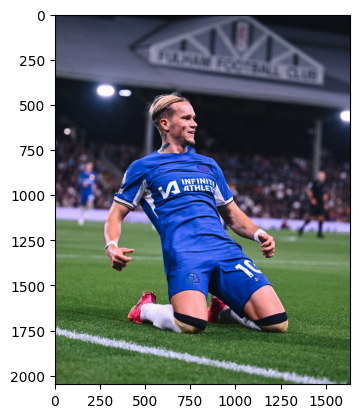

In [9]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
mudryk_path = '/content/drive/MyDrive/Machine Learning/Week 07/Tugas Praktikum/mudryk.jpg'
mudryk = io.imread(mudryk_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

plt.imshow(mudryk)

In [11]:
# Latih SOM

# Epoch menentukan berapa kali SOM akan dilatih pada data.
# Semakin banyak epoch, semakin banyak iterasi yang diperlukan untuk memperbarui bobot SOM, dan semakin lama waktu pelatihan.

num_epochs = 10 # jumlah num_epochs saya kurangi dari 100 ke 10 agar running time bisa dipersingkat
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(mudryk, num_epochs, initial_learning_rate, initial_neighborhood_radius)

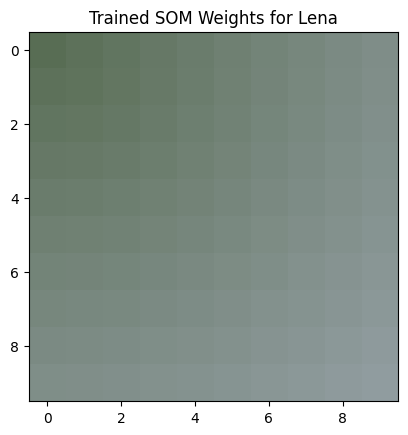

In [12]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()